In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"f30218f0-3583-40f2-8684-a2009028cafb\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Cleaned Up Model Final\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:
# import jinja2
# raw_query = """
#     select * from "combined_nfl_revised.csv";
# """
# sql_query = jinja2.Template(raw_query).render(vars())

In [ ]:
from sklearn.utils import resample
import pandas as pd

# Read in the CSV file
combined_nfl_revised = pd.read_csv("combined_nfl_revised.csv")
# Assuming 'To Win' is the target column for imbalance measurement
# and 'combined_nfl_revised' is the DataFrame loaded from 'combined_nfl_revised.csv'
target = combined_nfl_revised.columns[-1]

# Count the occurrences of each class
class_counts = combined_nfl_revised[target].value_counts()

# Display the class imbalance
imbalance = class_counts.max() / class_counts.min()
print(f"Class Imbalance Ratio: {imbalance}")
# Assuming the last column of 'combined_nfl_revised' DataFrame is the target
# Update the target variable to the last column's name

import pandas as pd


Class Imbalance Ratio: 1.0


/tmp/ipykernel_12/2753748962.py:39: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index


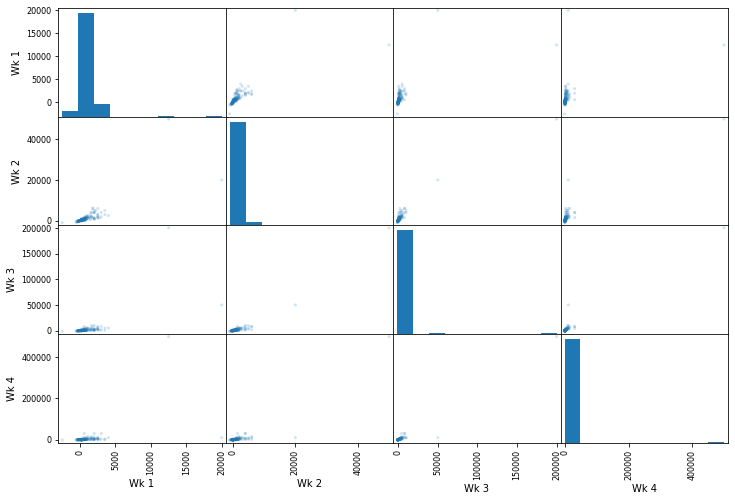

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
combined_nfl_revised = pd.read_csv("combined_nfl_revised.csv")

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
gs = GroupShuffleSplit(n_splits=2, train_size=.7, random_state=42)
combined_nfl_tables_test_final = pd.read_csv("combined_nfl_revised.csv")
import pandas as pd

combined_nfl_tables_test_final.rename(columns={"Unnamed: 52": "Week 18"}, inplace=True)

combined_nfl_tables_test_final.head()
combined_nfl_tables_test_final.drop(
    columns=[
        col
        for col in combined_nfl_tables_test_final.columns
        if "To Win" in col or "Deimcal Odds" in col
    ],
    inplace=True,
)

combined_nfl_tables_test_final = combined_nfl_tables_test_final.fillna(0)


combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
combined_nfl_tables_test_final = combined_nfl_tables_test_final.drop(
    combined_nfl_tables_test_final.columns[0], axis=1
)

combined_nfl_tables_test_final.to_csv("cleaned combined_nfl_tables_test_final.csv", index=False)

# Compare the first four columns in a scatter plot
first_four_columns = combined_nfl_tables_test_final.columns[:4]
pd.plotting.scatter_matrix(
    combined_nfl_tables_test_final[first_four_columns], alpha=0.2, figsize=(12, 8)
)
plt.show()

In [ ]:
#Baseline Model DecisionTree random features
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
gs = GroupShuffleSplit(n_splits=2, train_size=.7, random_state=42)
combined_nfl_tables_test_final = pd.read_csv("combined_nfl_revised.csv")
import pandas as pd

combined_nfl_tables_test_final.rename(columns={"Unnamed: 52": "Week 18"}, inplace=True)

combined_nfl_tables_test_final.head()
combined_nfl_tables_test_final.drop(
    columns=[
        col
        for col in combined_nfl_tables_test_final.columns
        if "To Win" in col or "Deimcal Odds" in col
    ],
    inplace=True,
)

combined_nfl_tables_test_final = combined_nfl_tables_test_final.fillna(0)


combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
combined_nfl_tables_test_final = combined_nfl_tables_test_final.drop(
    combined_nfl_tables_test_final.columns[0], axis=1
)

combined_nfl_tables_test_final["Group"] = (
    combined_nfl_tables_test_final.index // 4
) + 1
combined_nfl_tables_test_final = combined_nfl_tables_test_final[
    ["Group"]
    + [col for col in combined_nfl_tables_test_final.columns if col != "Group"]
]

from sklearn.utils import shuffle

grouped_samples = combined_nfl_tables_test_final.groupby("Group").apply(lambda x: x)

random_numbers = np.random.choice(range(1, 57), 20, replace=False)

selected_groups = grouped_samples[
    grouped_samples["Group"].isin(random_numbers)
]

y = grouped_samples.iloc[:, -1]

column_indices = np.arange(len(selected_groups.columns))
selected_columns = np.append(
    np.append(0, np.random.choice(column_indices[1:-1], 4, replace=False)), -1
)
selected_columns.sort()
selected_groups = selected_groups.iloc[:, selected_columns]


# Target variable is the last column
X1 = selected_groups.drop(selected_groups.columns[[0]],axis = 1)
y = selected_groups.iloc[:, 0]
X2 = selected_groups.drop(selected_groups.columns[[0,1]],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.2, random_state=42, shuffle=False)


X_train = X_train.sort_values("Group")
X_test = X_test.sort_values("Group")

X_train = X_train.drop(X_train.columns[0], axis=1)
X_test = X_test.drop(X_test.columns[0], axis=1)


# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


# Print recall
print("Recall:", recall_score(y_test, y_pred))

# Print precision
print("Precision:", precision_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.625
Recall: 0.25
Precision: 0.25
Confusion Matrix:
[[9 3]
 [3 1]]
/tmp/ipykernel_12/1582597310.py:34: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
/tmp/ipykernel_12/1582597310.py:49: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_samples = combined_nfl_tables_test_final.groupby("Group").apply(lambda x: x)


/tmp/ipykernel_12/771748109.py:33: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
/tmp/ipykernel_12/771748109.py:48: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_samples = combined_nfl_tables_test_final.groupby("Group").apply(lambda x: x)
Tree1 Accuracy: 0.8
Tree2 Accuracy: 0.425
Tree3 Accuracy: 0.6
Tree4 Accuracy: 0.775
Tree5 Acc

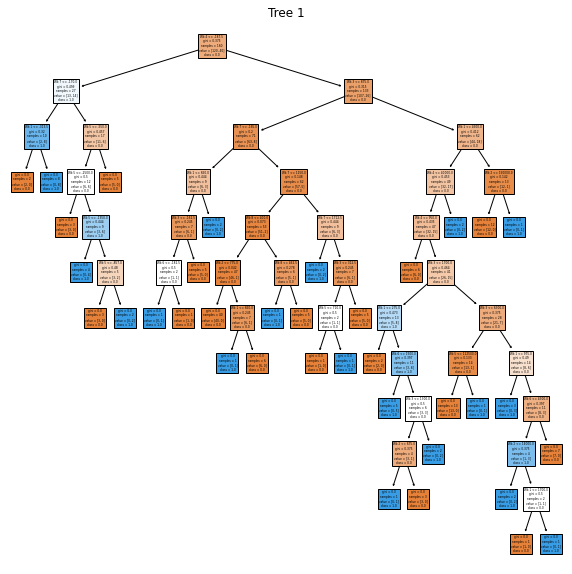

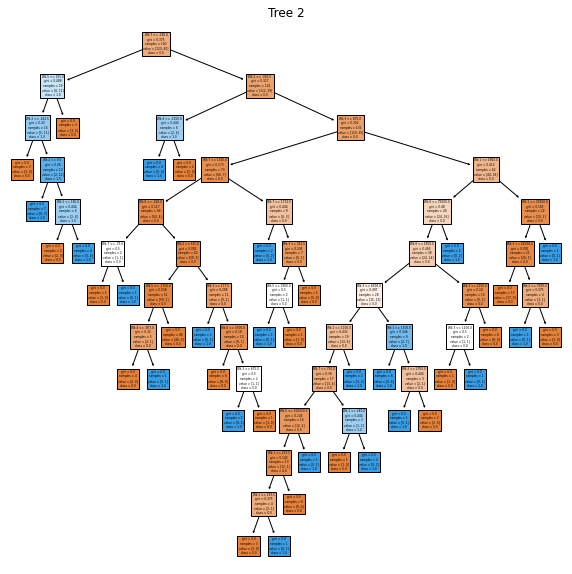

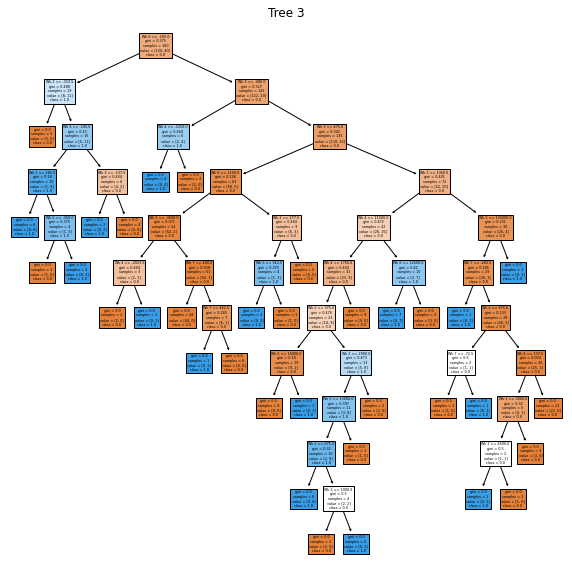

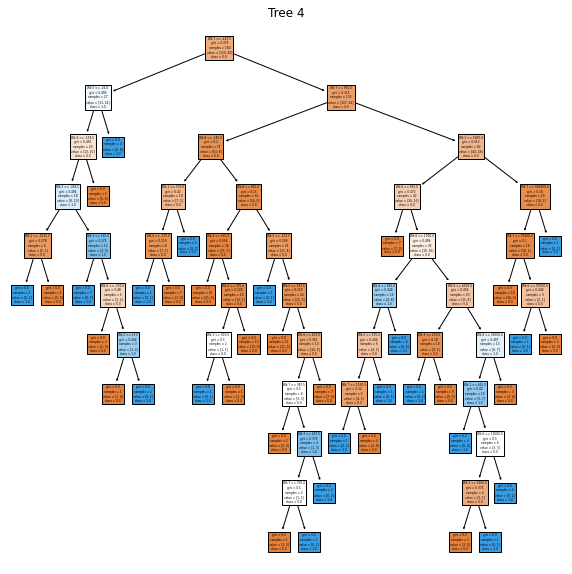

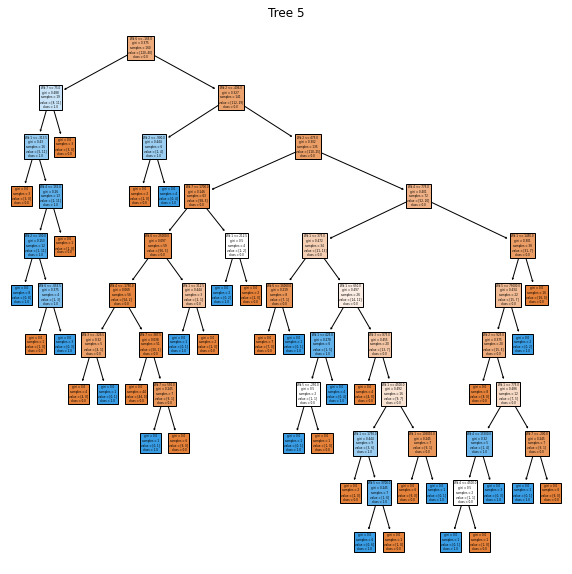

In [ ]:
# Random Forest Random Features
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import VotingClassifier

combined_nfl_tables_test_final = pd.read_csv("combined_nfl_revised.csv")

combined_nfl_tables_test_final.rename(columns={"Unnamed: 52": "Week 18"}, inplace=True)

combined_nfl_tables_test_final.head()
combined_nfl_tables_test_final.drop(
    columns=[
        col
        for col in combined_nfl_tables_test_final.columns
        if "To Win" in col or "Deimcal Odds" in col
    ],
    inplace=True,
)

combined_nfl_tables_test_final.head()
combined_nfl_tables_test_final = combined_nfl_tables_test_final.fillna(0)

combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
combined_nfl_tables_test_final = combined_nfl_tables_test_final.drop(
    combined_nfl_tables_test_final.columns[0], axis=1
)

combined_nfl_tables_test_final["Group"] = (
    combined_nfl_tables_test_final.index // 4
) + 1
combined_nfl_tables_test_final = combined_nfl_tables_test_final[
    ["Group"]
    + [col for col in combined_nfl_tables_test_final.columns if col != "Group"]
]

from sklearn.utils import shuffle

grouped_samples = combined_nfl_tables_test_final.groupby("Group").apply(lambda x: x)

random_numbers = np.random.choice(range(1, 57), 50, replace=False)

selected_groups = grouped_samples[grouped_samples["Group"].isin(random_numbers)]


column_indices = np.arange(len(selected_groups.columns))
selected_columns = np.append(
    np.append(0, np.random.choice(column_indices[1:-1], 17, replace=False)), -1
)
selected_columns.sort()
selected_groups = selected_groups.iloc[:, selected_columns]


# Target variable is the last column
X1 = selected_groups.drop(selected_groups.columns[[0]], axis=1)

y = selected_groups.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.2, random_state=42, shuffle=False
)

X_train = X_train.sort_values("Group")
X_test = X_test.sort_values("Group")

X_train = X_train.drop(X_train.columns[0], axis=1)
X_test = X_test.drop(X_test.columns[0], axis=1)

# Function to select random columns
random_features = random.sample(range(X_train.shape[1]), random.randint(5, 10))

# Create different train and test sets
X_train_1 = X_train.iloc[:, list(random_features)]
X_test_1 = X_test.iloc[:, list(random_features)]
X_train_1 = X_train_1.reindex(
    sorted(X_train_1.columns, key=lambda x: int(x.split(" ")[1])), axis=1
)
X_test_1 = X_test_1.reindex(
    sorted(X_test_1.columns, key=lambda x: int(x.split(" ")[1])), axis=1
)

random_features = random.sample(range(X_train.shape[1]), random.randint(5, 10))

X_train_2 = X_train.iloc[:, list(random_features)]
X_test_2 = X_test.iloc[:, list(random_features)]
X_train_2 = X_train_2.reindex(
    sorted(X_train_2.columns, key=lambda x: int(x.split(" ")[1])), axis=1
)
X_test_2 = X_test_2.reindex(
    sorted(X_test_2.columns, key=lambda x: int(x.split(" ")[1])), axis=1
)

random_features = random.sample(range(X_train.shape[1]), random.randint(5, 10))

X_train_3 = X_train.iloc[:, list(random_features)]
X_test_3 = X_test.iloc[:, list(random_features)]
X_train_3 = X_train_3.reindex(
    sorted(X_train_3.columns, key=lambda x: int(x.split(" ")[1])), axis=1
)
X_test_3 = X_test_3.reindex(
    sorted(X_test_3.columns, key=lambda x: int(x.split(" ")[1])), axis=1
)

random_features = random.sample(range(X_train.shape[1]), random.randint(5, 10))

X_train_4 = X_train.iloc[:, list(random_features)]
X_test_4 = X_test.iloc[:, list(random_features)]
X_train_4 = X_train_4.reindex(
    sorted(X_train_4.columns, key=lambda x: int(x.split(" ")[1])), axis=1
)
X_test_4 = X_test_4.reindex(
    sorted(X_test_4.columns, key=lambda x: int(x.split(" ")[1])), axis=1
)

random_features = random.sample(range(X_train.shape[1]), random.randint(5, 10))

X_train_5 = X_train.iloc[:, list(random_features)]
X_test_5 = X_test.iloc[:, list(random_features)]
X_train_5 = X_train_5.reindex(
    sorted(X_train_5.columns, key=lambda x: int(x.split(" ")[1])), axis=1
)
X_test_5 = X_test_5.reindex(
    sorted(X_test_5.columns, key=lambda x: int(x.split(" ")[1])), axis=1
)

# Initialize and train decision tree classifiers
Tree1 = DecisionTreeClassifier(random_state=42).fit(X_train_1, y_train)
Tree2 = DecisionTreeClassifier(random_state=42).fit(X_train_2, y_train)
Tree3 = DecisionTreeClassifier(random_state=42).fit(X_train_3, y_train)
Tree4 = DecisionTreeClassifier(random_state=42).fit(X_train_4, y_train)
Tree5 = DecisionTreeClassifier(random_state=42).fit(X_train_5, y_train)

# Predictions
y_pred1 = Tree1.predict(X_test_1)
y_pred2 = Tree2.predict(X_test_2)
y_pred3 = Tree3.predict(X_test_3)
y_pred4 = Tree4.predict(X_test_4)
y_pred5 = Tree5.predict(X_test_5)

# Accuracy scores
print("Tree1 Accuracy:", accuracy_score(y_test, y_pred1))
print("Tree2 Accuracy:", accuracy_score(y_test, y_pred2))
print("Tree3 Accuracy:", accuracy_score(y_test, y_pred3))
print("Tree4 Accuracy:", accuracy_score(y_test, y_pred4))
print("Tree5 Accuracy:", accuracy_score(y_test, y_pred5))

# Voting classifier
estimators = [
    ("DTC1", Tree1),
    ("DTC2", Tree2),
    ("DTC3", Tree3),
    ("DTC4", Tree4),
    ("DTC5", Tree5),
]
vot_soft = VotingClassifier(estimators=estimators, voting="soft")
vot_soft.fit(X_train, y_train)
y_pred_ensemble = vot_soft.predict(X_test)

# Ensemble accuracy and F1 scores
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Soft Voting Accuracy", ensemble_accuracy)

# F1 scores for individual trees
f1_scores = [
    f1_score(y_test, y_pred, average="macro")
    for y_pred in [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5]
]
print(f1_scores)

# F1 score for the ensemble
ensemble_f1 = f1_score(y_test, y_pred_ensemble, average="macro")
print(ensemble_f1)


# Plotting the trees
from sklearn import tree

feature_names = X_train.columns
class_names = [str(cls) for cls in np.unique(y_train)]

for i, model in enumerate([Tree1, Tree2, Tree3, Tree4, Tree5], start=1):
    plt.figure(figsize=(10, 10))
    tree.plot_tree(
        model, feature_names=feature_names, class_names=class_names, filled=True
    )
    plt.title(f"Tree {i}")
    plt.show()
# Print F1 scores for individual trees



/tmp/ipykernel_12/2097696551.py:35: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
/tmp/ipykernel_12/2097696551.py:50: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_samples = combined_nfl_tables_test_final.groupby("Group").apply(lambda x: x)


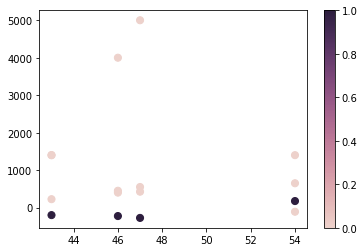

Accuracy: 1.0
F1 Score: 1.0


In [ ]:
#K_Nearest_Neighbor
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

combined_nfl_tables_test_final = pd.read_csv("combined_nfl_revised.csv")
import pandas as pd

combined_nfl_tables_test_final.rename(columns={"Unnamed: 52": "Week 18"}, inplace=True)

combined_nfl_tables_test_final.head()
combined_nfl_tables_test_final.drop(
    columns=[
        col
        for col in combined_nfl_tables_test_final.columns
        if "To Win" in col or "Deimcal Odds" in col
    ],
    inplace=True,
)

combined_nfl_tables_test_final.head()
combined_nfl_tables_test_final = combined_nfl_tables_test_final.fillna(0)

combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
combined_nfl_tables_test_final = combined_nfl_tables_test_final.drop(
    combined_nfl_tables_test_final.columns[0], axis=1
)

combined_nfl_tables_test_final["Group"] = (
    combined_nfl_tables_test_final.index // 4
) + 1
combined_nfl_tables_test_final = combined_nfl_tables_test_final[
    ["Group"]
    + [col for col in combined_nfl_tables_test_final.columns if col != "Group"]
]

from sklearn.utils import shuffle

grouped_samples = combined_nfl_tables_test_final.groupby("Group").apply(lambda x: x)

random_numbers = np.random.choice(range(1, 57), 20, replace=False)

selected_groups = grouped_samples[grouped_samples["Group"].isin(random_numbers)]

y = grouped_samples.iloc[:, -1]

column_indices = np.arange(len(selected_groups.columns))
selected_columns = np.append(
    np.append(0, np.random.choice(column_indices[1:-1], size=5, replace=False)), -1
)
selected_columns.sort()
selected_groups = selected_groups.iloc[:, selected_columns]


# Target variable is the last column
X1 = selected_groups.drop(selected_groups.columns[[0]], axis=1)
y = selected_groups.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.2, random_state=42, shuffle=False
)
x_train = X_train.sort_values("Group")
x_test = X_test.sort_values("Group")

x_train.drop("Group", axis=1, inplace=True)
x_test.drop("Group", axis=1, inplace=True)


# Create K Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
knn.fit(X_train, y_train)
# Calculate the accuracy of the KNN classifier on the test set
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
import seaborn as sns

# Assuming the previous steps are correct and we have the correct dataframes and variables
# The error is in the scatter plot part where X_test is being accessed with numpy-like indexing
# which is not valid for pandas dataframes. We need to use .iloc for positional indexing.

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

# For the kneighbors call, we need to ensure that we are passing a dataframe or array-like structure
# Since X_test is a dataframe, we can use .iloc to select rows in a dataframe-like way
knn.kneighbors(X_test.iloc[0:1], return_distance=True)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1 Score:", f1)

In [ ]:
#Decision tree picking features in order over 1.25 odds return
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import GroupShuffleSplit

gs = GroupShuffleSplit(n_splits=2, train_size=0.7, random_state=42)
combined_nfl_tables_test_final = pd.read_csv("combined_nfl_revised.csv")

combined_nfl_tables_test_final.rename(columns={"Unnamed: 52": "Week 18"}, inplace=True)

combined_nfl_tables_test_final.head()
combined_nfl_tables_test_final.drop(
    columns=[
        col
        for col in combined_nfl_tables_test_final.columns
        if "To Win" in col or "Deimcal Odds" in col
    ],
    inplace=True,
)

combined_nfl_tables_test_final = combined_nfl_tables_test_final.fillna(0)


combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
combined_nfl_tables_test_final = combined_nfl_tables_test_final.drop(
    combined_nfl_tables_test_final.columns[0], axis=1
)

combined_nfl_tables_test_final["Group"] = (
    combined_nfl_tables_test_final.index // 4
) + 1
combined_nfl_tables_test_final = combined_nfl_tables_test_final[
    ["Group"]
    + [col for col in combined_nfl_tables_test_final.columns if col != "Group"]
]

from sklearn.utils import shuffle

grouped_samples = combined_nfl_tables_test_final.groupby("Group").apply(lambda x: x)

random_numbers = np.random.choice(range(1, 57), 55, replace=False)

selected_groups = grouped_samples[grouped_samples["Group"].isin(random_numbers)]

y = grouped_samples.iloc[:, -1]

column_indices = np.arange(len(selected_groups.columns))
selected_columns = np.append(
    np.append(0, np.random.choice(column_indices[1:-1], 17, replace=False)), -1
)
selected_columns.sort()
selected_groups = selected_groups.iloc[:, selected_columns]


# Target variable is the last column
X1 = selected_groups.drop(selected_groups.columns[[0]], axis=1)
y = selected_groups.iloc[:, 0]
X2 = selected_groups.drop(selected_groups.columns[[0, 1]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.2, random_state=42, shuffle=False
)


X_train = X_train.sort_values("Group")
X_test = X_test.sort_values("Group")

X_train = X_train.drop(X_train.columns[0], axis=1)
X_test = X_test.drop(X_test.columns[0], axis=1)


def select_features(dataframe, num_features):
    columns = (
        [dataframe.columns[0]]
        + list(dataframe.columns[1 : num_features])
        
    )
    return dataframe[columns]
x_train = select_features(X_train, 7)
x_test = select_features(X_test, 7)

def american_to_decimal_odds(american_odds):
    if american_odds > 0:
        return (american_odds / 100) + 1
    elif american_odds < 0:
        return (100 / abs(american_odds)) + 1
    else:
        return american_odds


x_train["odds_decimal"] = x_train.iloc[:, -1].apply(
    lambda x: american_to_decimal_odds(x) if x != 0 else x
)
x_test["odds_decimal"] = x_test.iloc[:, -1].apply(
    lambda x: american_to_decimal_odds(x) if x != 0 else x
)


# Apply the function to the last column of x_train and x_test, ignoring zeros
# Add a new column based on the last column using the american_to_decimal_odds function


y_train = ((x_train["odds_decimal"] >= .75) & (y_train == 1)).astype(int)
y_test = ((x_test["odds_decimal"] >= .75) & (y_test == 1)).astype(int)

# Update target values in y_train and y_test based on the condition
x_train = x_train.drop(x_train.columns[-1], axis=1)
x_test = x_test.drop(x_test.columns[-1], axis=1)

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)
print(y_pred)
# Print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(f1_score(y_test, y_pred))

[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0]
0.6818181818181818
0.2222222222222222
/tmp/ipykernel_12/2909734241.py:34: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
/tmp/ipykernel_12/2909734241.py:49: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_samples = combined_nfl_tables_test_fina

In [ ]:
#Ensemble picking features in order over 1.25 odds return
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import GroupShuffleSplit

gs = GroupShuffleSplit(n_splits=2, train_size=0.7, random_state=42)
combined_nfl_tables_test_final = pd.read_csv("combined_nfl_revised.csv")

combined_nfl_tables_test_final.rename(columns={"Unnamed: 52": "Week 18"}, inplace=True)

combined_nfl_tables_test_final.head()
combined_nfl_tables_test_final.drop(
    columns=[
        col
        for col in combined_nfl_tables_test_final.columns
        if "To Win" in col or "Deimcal Odds" in col
    ],
    inplace=True,
)

combined_nfl_tables_test_final = combined_nfl_tables_test_final.fillna(0)


combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
combined_nfl_tables_test_final = combined_nfl_tables_test_final.drop(
    combined_nfl_tables_test_final.columns[0], axis=1
)

combined_nfl_tables_test_final["Group"] = (
    combined_nfl_tables_test_final.index // 4
) + 1
combined_nfl_tables_test_final = combined_nfl_tables_test_final[
    ["Group"]
    + [col for col in combined_nfl_tables_test_final.columns if col != "Group"]
]

from sklearn.utils import shuffle

grouped_samples = combined_nfl_tables_test_final.groupby("Group").apply(lambda x: x)

random_numbers = np.random.choice(range(1, 57), 56, replace=False)

selected_groups = grouped_samples[grouped_samples["Group"].isin(random_numbers)]

y = grouped_samples.iloc[:, -1]

column_indices = np.arange(len(selected_groups.columns))
selected_columns = np.append(
    np.append(0, np.random.choice(column_indices[1:-1], 17, replace=False)), -1
)
selected_columns.sort()
selected_groups = selected_groups.iloc[:, selected_columns]


# Target variable is the last column
X1 = selected_groups.drop(selected_groups.columns[[0]], axis=1)
y = selected_groups.iloc[:, 0]
X2 = selected_groups.drop(selected_groups.columns[[0, 1]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.2, random_state=42, shuffle=False
)


X_train = X_train.sort_values("Group")
X_test = X_test.sort_values("Group")

X_train = X_train.drop(X_train.columns[0], axis=1)
X_test = X_test.drop(X_test.columns[0], axis=1)


def select_features(dataframe, num_features):
    columns = (
        [dataframe.columns[0]]
        + list(dataframe.columns[1 : num_features])
        
    )
    return dataframe[columns]
x_train = select_features(X_train, 10)
x_test = select_features(X_test, 10)

def american_to_decimal_odds(american_odds):
    if american_odds > 0:
        return (american_odds / 100) + 1
    elif american_odds < 0:
        return (100 / abs(american_odds)) + 1
    else:
        return american_odds


x_train["odds_decimal"] = x_train.iloc[:, -1].apply(
    lambda x: american_to_decimal_odds(x) if x != 0 else x
)
x_test["odds_decimal"] = x_test.iloc[:, -1].apply(
    lambda x: american_to_decimal_odds(x) if x != 0 else x
)


# Apply the function to the last column of x_train and x_test, ignoring zeros
# Add a new column based on the last column using the american_to_decimal_odds function


y_train = ((x_train["odds_decimal"] >= .5) & (y_train == 1)).astype(int)
y_test = ((x_test["odds_decimal"] >= .5) & (y_test == 1)).astype(int)

# Update target values in y_train and y_test based on the condition
x_train = x_train.drop(x_train.columns[-1], axis=1)
x_test = x_test.drop(x_test.columns[-1], axis=1)

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)
print(y_pred)
# Print accuracy




from sklearn.linear_model import Perceptron
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score

# Train a Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

# Create an ensemble with Perceptron and DecisionTreeClassifier
# Since Perceptron does not support predict_proba, we use hard voting
ensemble_clf = VotingClassifier(
    estimators=[("dt", clf), ("perceptron", perceptron)], voting="hard"
)
ensemble_clf.fit(x_train, y_train)

# Make predictions with the ensemble
y_pred_ensemble = ensemble_clf.predict(x_test)

# Calculate accuracy and F1 score
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble)


# Print accuracy and F1 score for the DecisionTreeClassifier
accuracy_dt = accuracy_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree F1 Score:", f1_dt)

# Print accuracy and F1 score for the Perceptron
y_pred_perceptron = perceptron.predict(x_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
f1_perceptron = f1_score(y_test, y_pred_perceptron)
print("Perceptron Accuracy:", accuracy_perceptron)
print("Perceptron F1 Score:", f1_perceptron)

# Print accuracy and F1 score for the Ensemble
print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble F1 Score:", ensemble_f1)

# Since the ensemble uses hard voting, we need to get the individual predictions
# and then apply the threshold to the average of the predictions
y_pred_proba_dt = clf.predict_proba(x_test)[:, 1]
y_pred_proba_perceptron = perceptron.decision_function(x_test)
y_pred_proba_perceptron = (y_pred_proba_perceptron - y_pred_proba_perceptron.min()) / (
    y_pred_proba_perceptron.max() - y_pred_proba_perceptron.min()
)

# Average the probabilities
y_pred_proba_ensemble = (y_pred_proba_dt + y_pred_proba_perceptron) / 2

# Apply the threshold
y_pred_ensemble_threshold = binarize(
    y_pred_proba_ensemble.reshape(-1, 1), threshold=0.2
).reshape(-1)

# Calculate new accuracy and F1 score with the adjusted threshold
ensemble_accuracy_threshold = accuracy_score(y_test, y_pred_ensemble_threshold)
ensemble_f1_threshold = f1_score(y_test, y_pred_ensemble_threshold)

# Print the new accuracy and F1 score
print("Ensemble Accuracy with 0.1 threshold:", ensemble_accuracy_threshold)
print("Ensemble F1 Score with 0.1 threshold:", ensemble_f1_threshold)
print(y_pred_ensemble)



[0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0]
Decision Tree Accuracy: 0.6888888888888889
Decision Tree F1 Score: 0.36363636363636365
Perceptron Accuracy: 0.4444444444444444
Perceptron F1 Score: 0.28571428571428575
Ensemble Accuracy: 0.6666666666666666
Ensemble F1 Score: 0.0
Ensemble Accuracy with 0.1 threshold: 0.24444444444444444
Ensemble F1 Score with 0.1 threshold: 0.39285714285714285
[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0]
/tmp/ipykernel_12/3421218440.py:34: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
/tmp/ipykernel_12/3421218440.py:49: FutureWarning: Not prepending group keys to

In [ ]:
#Ensemble picking features in order over 1.25 odds return
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import GroupShuffleSplit

gs = GroupShuffleSplit(n_splits=2, train_size=0.7, random_state=42)
combined_nfl_tables_test_final = pd.read_csv("combined_nfl_revised.csv")

combined_nfl_tables_test_final.rename(columns={"Unnamed: 52": "Week 18"}, inplace=True)

combined_nfl_tables_test_final.head()
combined_nfl_tables_test_final.drop(
    columns=[
        col
        for col in combined_nfl_tables_test_final.columns
        if "To Win" in col or "Deimcal Odds" in col
    ],
    inplace=True,
)

combined_nfl_tables_test_final = combined_nfl_tables_test_final.fillna(0)


combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
combined_nfl_tables_test_final = combined_nfl_tables_test_final.drop(
    combined_nfl_tables_test_final.columns[0], axis=1
)

combined_nfl_tables_test_final["Group"] = (
    combined_nfl_tables_test_final.index // 4
) + 1
combined_nfl_tables_test_final = combined_nfl_tables_test_final[
    ["Group"]
    + [col for col in combined_nfl_tables_test_final.columns if col != "Group"]
]

from sklearn.utils import shuffle

grouped_samples = combined_nfl_tables_test_final.groupby("Group").apply(lambda x: x)

random_numbers = np.random.choice(range(1, 57), 20, replace=False)

selected_groups = grouped_samples[grouped_samples["Group"].isin(random_numbers)]

y = grouped_samples.iloc[:, -1]

column_indices = np.arange(len(selected_groups.columns))
selected_columns = np.append(
    np.append(0, np.random.choice(column_indices[1:-1], 14, replace=False)), -1
)
selected_columns.sort()
selected_groups = selected_groups.iloc[:, selected_columns]


# Target variable is the last column
X1 = selected_groups.drop(selected_groups.columns[[0]], axis=1)
y = selected_groups.iloc[:, 0]
X2 = selected_groups.drop(selected_groups.columns[[0, 1]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.2, random_state=42, shuffle=False
)


X_train = X_train.sort_values("Group")
X_test = X_test.sort_values("Group")

X_train = X_train.drop(X_train.columns[0], axis=1)
X_test = X_test.drop(X_test.columns[0], axis=1)


def select_features(dataframe, num_features):
    columns = (
        [dataframe.columns[0]]
        + list(dataframe.columns[1 : num_features])
        
    )
    return dataframe[columns]
x_train = select_features(X_train, 8)
x_test = select_features(X_test, 8)

def american_to_decimal_odds(american_odds):
    if american_odds > 0:
        return (american_odds / 100) + 1
    elif american_odds < 0:
        return (100 / abs(american_odds)) + 1
    else:
        return american_odds


x_train["odds_decimal"] = x_train.iloc[:, -1].apply(
    lambda x: american_to_decimal_odds(x) if x != 0 else x
)
x_test["odds_decimal"] = x_test.iloc[:, -1].apply(
    lambda x: american_to_decimal_odds(x) if x != 0 else x
)


# Apply the function to the last column of x_train and x_test, ignoring zeros
# Add a new column based on the last column using the american_to_decimal_odds function


y_train = ((x_train["odds_decimal"] >= 5))
y_test = ((x_test["odds_decimal"] >= 5))

# Update target values in y_train and y_test based on the condition
x_train = x_train.drop(x_train.columns[-1], axis=1)
x_test = x_test.drop(x_test.columns[-1], axis=1)

# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)
print(y_pred)
# Print accuracy




from sklearn.linear_model import Perceptron
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score

# Train a Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

# Create an ensemble with Perceptron and DecisionTreeClassifier
# Since Perceptron does not support predict_proba, we use hard voting
ensemble_clf = VotingClassifier(
    estimators=[("dt", clf), ("perceptron", perceptron)], voting="hard"
)
ensemble_clf.fit(x_train, y_train)

# Make predictions with the ensemble
y_pred_ensemble = ensemble_clf.predict(x_test)

# Calculate accuracy and F1 score
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble)


# Print accuracy and F1 score for the DecisionTreeClassifier
accuracy_dt = accuracy_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree F1 Score:", f1_dt)

# Print accuracy and F1 score for the Perceptron
y_pred_perceptron = perceptron.predict(x_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
f1_perceptron = f1_score(y_test, y_pred_perceptron)
print("Perceptron Accuracy:", accuracy_perceptron)
print("Perceptron F1 Score:", f1_perceptron)

# Print accuracy and F1 score for the Ensemble
print("Ensemble Accuracy:", ensemble_accuracy)
print("Ensemble F1 Score:", ensemble_f1)
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for the ensemble
confusion_mat_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print(confusion_mat_ensemble)
# Calculate precision and recall for the DecisionTreeClassifier
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)

# Calculate precision and recall for the Perceptron
precision_perceptron = precision_score(y_test, y_pred_perceptron)
recall_perceptron = recall_score(y_test, y_pred_perceptron)
print("Perceptron Precision:", precision_perceptron)
print("Perceptron Recall:", recall_perceptron)

# Calculate precision and recall for the Ensemble
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
print("Ensemble Precision:", precision_ensemble)
print("Ensemble Recall:", recall_ensemble)
# Adjust the decision threshold for the ensemble to 0.3
from sklearn.preprocessing import binarize

# Since the ensemble uses hard voting, we need to get the individual predictions
# and then apply the threshold to the average of the predictions
y_pred_proba_dt = clf.predict_proba(x_test)[:, 1]
y_pred_proba_perceptron = perceptron.decision_function(x_test)
y_pred_proba_perceptron = (y_pred_proba_perceptron - y_pred_proba_perceptron.min()) / (
    y_pred_proba_perceptron.max() - y_pred_proba_perceptron.min()
)

# Average the probabilities
y_pred_proba_ensemble = (y_pred_proba_dt + y_pred_proba_perceptron) / 2

# Apply the threshold
y_pred_ensemble_threshold = binarize(
    y_pred_proba_ensemble.reshape(-1, 1), threshold=0.3
).reshape(-1)

# Calculate new accuracy and F1 score with the adjusted threshold
ensemble_accuracy_threshold = accuracy_score(y_test, y_pred_ensemble_threshold)
ensemble_f1_threshold = f1_score(y_test, y_pred_ensemble_threshold)

# Print the new accuracy and F1 score
print("Ensemble Accuracy with 0.3 threshold:", ensemble_accuracy_threshold)
print("Ensemble F1 Score with 0.3 threshold:", ensemble_f1_threshold)

[False  True  True  True False  True  True  True False  True  True  True
 False False  True  True]
Decision Tree Accuracy: 1.0
Decision Tree F1 Score: 1.0
Perceptron Accuracy: 1.0
Perceptron F1 Score: 1.0
Ensemble Accuracy: 1.0
Ensemble F1 Score: 1.0
[[ 5  0]
 [ 0 11]]
Decision Tree Precision: 1.0
Decision Tree Recall: 1.0
Perceptron Precision: 1.0
Perceptron Recall: 1.0
Ensemble Precision: 1.0
Ensemble Recall: 1.0
Ensemble Accuracy with 0.3 threshold: 1.0
Ensemble F1 Score with 0.3 threshold: 1.0
/tmp/ipykernel_12/760221837.py:34: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  combined_nfl_tables_test_final.iloc[:, 0] = combined_nfl_tables_test_final.index
/tmp/ipykernel_12/760221837.py:49: FutureWarning: Not prepending group keys to the result index of transform